# IML Assignment 1

## Name: Danil Davydov


## Mail: d.davydov@innopolis.university


## Group: DS-01

### Code style policy 

We expect you to follow https://peps.python.org/pep-0008/ Python standart style and will reduce your points if you don't. Also we ask you to comment your code when it's needed (logical blocks, function declaration, loops), however over-documentation is the evil.

Example of nice code style (no need to run this cells):

In [1]:
# This function returns the sum of parameters
# @param my_param1 - here I explain what this parameter means
# @param my_param2 - here I explain what this parameter means
# @return - result of func if it's not void
# def my_func(my_param1: int, my_param2: int)
#     return my_param1 + my_param2

There are few lines only, but they are represents important logical blocks, thus you should explain what their purpose:

In [2]:
# # from my_training_package import my_regression, my_loader
# 
# # Data loading
# x, y = my_loader.load("some.csv")
# 
# # Training
# reg = my_regression()
# reg.train(x, y)
# 
# # Evaluation on the same data set
# y_pred = reg.evaluation(y)

Example of too detailed and meaningless commenting that is not welcome:

In [3]:
# Import numpy package
import numpy as np

# This is variable x
x = 5
# This is variable y
y = 10
# Print x
print(x)

5


Ultimately, we belive in your programming common sense :) The purpose of clear code style is fast and smooth grading of your implementation and checking that you understand ML concepts.

## Task 1

### 3.1. Linear Regression
#### Data reading

In [4]:
import pandas as pd

# TODO Write your code here
# Reading the dataset and showing its first five rows
df = pd.read_csv('train_1.csv', encoding='utf-8')
df = df.drop(columns='Unnamed: 0')
df.describe()

,X_1,X_2,X_3,X_4,y
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.075478,0.041934,-0.130807,-0.059453,-1.332015
std,1.500916,1.474497,4.463827,1.357060,176.755122
min,-2.488802,-2.434812,-8.199202,-2.465302,-500.685755
25%,-1.225550,-1.193767,-4.022389,-1.159723,-57.207617
50%,0.029351,0.065280,-0.055932,-0.053247,-3.142114
75%,1.291268,1.366516,3.521199,1.037940,64.461309
max,2.493593,2.476781,7.662636,2.486997,552.793890


#### Train\validation splitting

In [5]:
from sklearn.model_selection import train_test_split

# TODO Write your code here
# features/target breaking and train/validation splitting
X, y = df.drop(columns=['y']), df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

#### Linear regression model fitting

In [6]:
from sklearn.linear_model import LinearRegression

# Declare and train a linear regression model
# TODO Write your code here
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prediction by model on the validation set
# TODO Write your code here
y_pred_lr = linear_model.predict(X_test)

#### Linear regression model prediction & Evaluation


In [7]:
from sklearn import metrics
import numpy as np


# Print MSE, RMSE, MAE and R2 score
# @param y_actual - initial target values
# @param y_pred - predicted target values
def print_metrics(y_actual, y_pred):
    # TODO Write your code here
    print('MSE: ', metrics.mean_squared_error(y_actual, y_pred))
    print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))
    print('MAE: ', metrics.mean_absolute_error(y_actual, y_pred))
    print('R2: ', metrics.r2_score(y_actual, y_pred))


print_metrics(y_test, y_pred_lr)

MSE:  5190.863198937693
RMSE:  72.04764533930094
MAE:  56.10833298260368
R2:  0.8377551324930081


### 3. 2 Polynomial Regression
#### Constructing the polynomial regression pipeline

In [8]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [9]:
# TODO Write your code here
# making pipeline for polynomial regression
pipeline = Pipeline([('polynom_features', PolynomialFeatures(degree=2)),
                     ('linear_model', LinearRegression())])

#### Tuning the degree hyper-parameter using GridSearch

In [10]:
from sklearn.model_selection import GridSearchCV

# Declare a GridSearch instance 
# TODO Write your code here
degree_hyper_param = {'polynom_features__degree': range(2, 6)}
search = GridSearchCV(pipeline, degree_hyper_param, scoring='neg_mean_squared_error', cv=8)

# Train the GridSearch
# TODO Write your code here
search.fit(X_train, y_train)

# Find the optimum degrees
# TODO Write your code here
print(f"Best parameter: {search.best_params_['polynom_features__degree']}")
# Print the GridSearchCV score
# TODO Write your code here
print(f"search score: {search.best_score_}")

Best parameter: 4
search score: -0.7832177152093427


In [11]:
print_metrics(y_test, search.predict(X_test))

MSE:  0.16973226365165286
RMSE:  0.4119857566125956
MAE:  0.3186197014057538
R2:  0.9999946948729773


#### Save the model

In [12]:
import pickle

# Save the GridSearch model for evaluation
filename = 'poly_optimized_model.sav'
pickle.dump(search, open(filename, 'wb'))

### 3.3 Determine the linear dependent features

Use the following code cell to determine a pair of features from the training dataset that are correlated to each other. Explain your choise in the markdown cell.

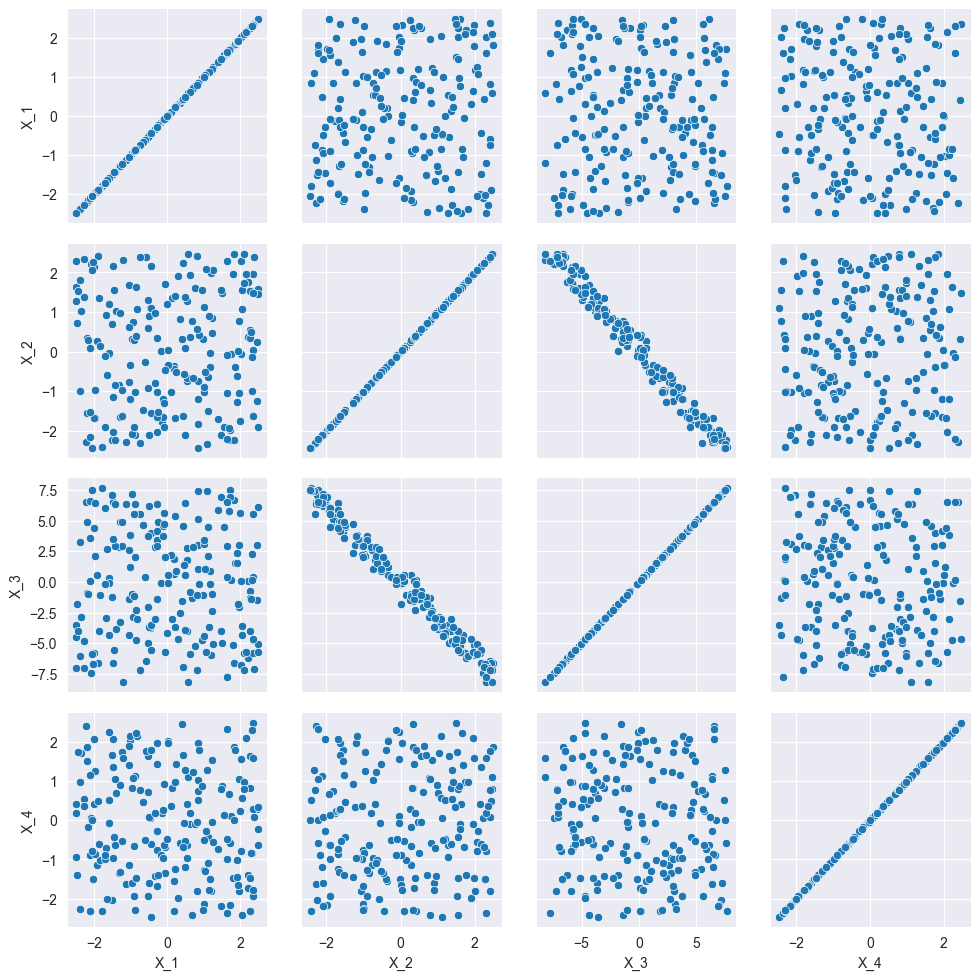

In [13]:
# TODO Write your code here
from seaborn import PairGrid
from seaborn import scatterplot

# plotting the chart to determine correlated features
pg = PairGrid(X)
pg.map(scatterplot)

As I can see, features X_2 and X_3 are very negatively correlated. Their paired graph looks like the straight line, thus they are a correlated pair of features.

## Task 2

### 4.1 Data processing
#### Loading the dataset

In [14]:
import pandas as pd

#### Exploring the dataset  and removing 2 redundant features

In [15]:
# TODO Write your code here
# reading the dataset
df = pd.read_csv('pokemon_modified.csv')
df = df.drop(columns=['name', 'classification'])
df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,type1,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0.7,45,88.1,grass,65,65,45,6.9,1,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,1.0,60,88.1,grass,80,80,60,13.0,1,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,2.0,80,88.1,grass,122,120,80,100.0,1,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0.6,39,88.1,fire,60,50,65,8.5,1,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,1.1,58,88.1,fire,80,65,80,19.0,1,0


I removed 2 columns: name, classification, because name is giving no information since every pokemon can be legendary without looking to its name, and classification also is unnecessary since the amount of classes is enormously big and it wouldn't help in classification. After all, those columns is much less informative than others.

#### Splitting the data
Use random_state = 123, stratify, and set test_size = 0.2

In [16]:
from sklearn.model_selection import train_test_split

# TODO Write your code here
X, y = df.drop(columns=['is_legendary']), df['is_legendary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

Check if the dataset is balanced or not and comment on it

In [17]:
# TODO Write your code here
print(pd.value_counts(y))

is_legendary
0    731
1     70
Name: count, dtype: int64


C:\Users\danil\AppData\Local\Temp\ipykernel_3152\450320291.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y))


The dataset is unbalanced since number of legendary pokemons is much lesser than non-legendary pokemons.

#### Checking for missing values

In [18]:
# TODO Write your code here
# determine the columns which are missing values
# @param data - pandas DataFrame
def columns_with_missing_values(data):
    missing_values_columns = []
    for column in data.columns:
        if any(data[column].isnull()):
            missing_values_columns.append(column)
    return missing_values_columns


# which columns are missing values
missing_values_columns = columns_with_missing_values(X)
print(missing_values_columns, 'are missing some values')

['height_m', 'percentage_male', 'weight_kg'] are missing some values


#### Impute the missing values

In [19]:
from sklearn.impute import SimpleImputer

# Define a SimpleImputer instance
# TODO Write your code here
imputer = SimpleImputer(strategy='mean')

# Apply the imputer
# TODO Write your code here
imputer.fit(X_train[missing_values_columns])
X_train[missing_values_columns] = imputer.transform(X_train[missing_values_columns])
imputer.fit(X_test[missing_values_columns])
X_test[missing_values_columns] = imputer.transform(X_test[missing_values_columns])


#### Double check that there are no missing values

In [20]:
# TODO Write your code here
# double check missing values
print(columns_with_missing_values(pd.concat([X_test, X_train])), 'are missing some values')

[] are missing some values


#### Encode categorically

In [21]:
# TODO Write your code here
from sklearn.preprocessing import OneHotEncoder

# create instance of OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False, )
# selecting the categorical features
cat = []
for column in X:
    if X[column].dtype == 'object':
        cat.append(column)
# fitting the encoder
ohe.fit(X[cat])

# apply encoder to test and train with deleting previous categorical columns
ohe_train_col = pd.DataFrame(ohe.transform(X_train[cat]))
ohe_test_col = pd.DataFrame(ohe.transform(X_test[cat]))

ohe_train_col.columns = ohe.get_feature_names_out()
ohe_test_col.columns = ohe.get_feature_names_out()

ohe_train_col.index = X_train.index
ohe_test_col.index = X_test.index

num_X_train = X_train.drop(columns=cat)
num_X_test = X_test.drop(columns=cat)

X_train_enc = pd.concat([num_X_train, ohe_train_col], axis=1)
X_test_enc = pd.concat([num_X_test, ohe_test_col], axis=1)


#### Scale the data

In [22]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Define a scaler instance from one of the above
# TODO Write your code here
scaler = RobustScaler().fit(pd.concat([X_train_enc, X_test_enc]))

# Apply the scaler on both train and test features
# TODO Write your code here
x_train = pd.DataFrame(scaler.transform(X_train_enc))
x_train.columns = X_train_enc.columns
x_test = pd.DataFrame(scaler.transform(X_test_enc))
x_test.columns = X_test_enc.columns

#### <span style="color:red">Correlation matrix</span>

Are there highly co-related features in the dataset? Is it a problem? Explain in the markdown cell.

<Axes: >

<Figure size 4000x4000 with 0 Axes>

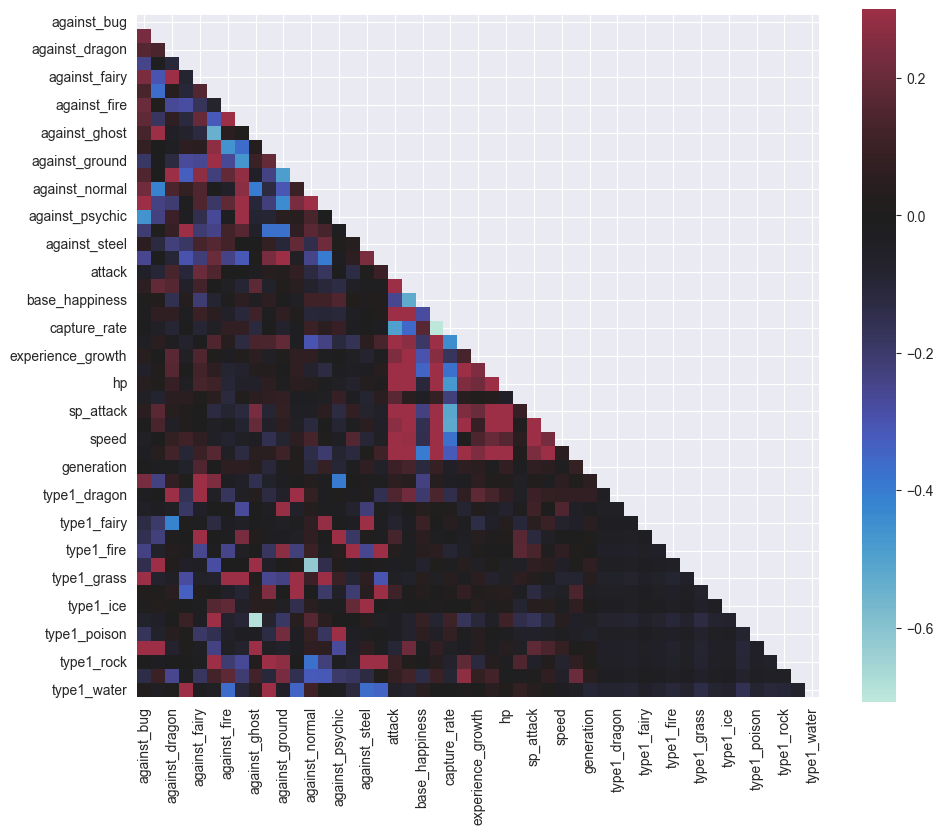

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# source https://seaborn.pydata.org/examples/many_pairwise_correlations.html
plt.figure(figsize=(40, 40))

# Plot the correlation matrix
corr = pd.concat([x_train, x_test]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, )
# TODO Write your code here

There are certain features that correlate. I will remove one from the pair of features if the correlation coefficient > 0.5 by absolute value and the correlation is significant in the population using correlation test

In [24]:
from scipy.stats import pearsonr

#source https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on

col_corr = set()  # Set of all the names of deleted columns
concatenated = pd.concat([x_train, x_test])
corr_matrix = concatenated.corr()
sign_level = 0.05
deleted = 0
# delete columns which provably has correlation with at least one column using correlation test
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if j > len(concatenated.columns) - 1 or i > len(concatenated.columns) - 1:
            break
        if pearsonr(concatenated.iloc[:, i], concatenated.iloc[:, j])[1] < sign_level and (
                corr_matrix.columns[j] not in col_corr) and abs(corr_matrix.iloc[i, j]) > 0.5:

            colname = corr_matrix.columns[i]  # getting the name of column
            col_corr.add(colname)
            if colname in concatenated.columns:
                deleted += 1
                del concatenated[colname]
                del x_test[colname]
                del x_train[colname]  # deleting the column from the dataset
    if i > len(concatenated.columns) - 1:
        break


(801, 41)


<Figure size 4000x4000 with 0 Axes>

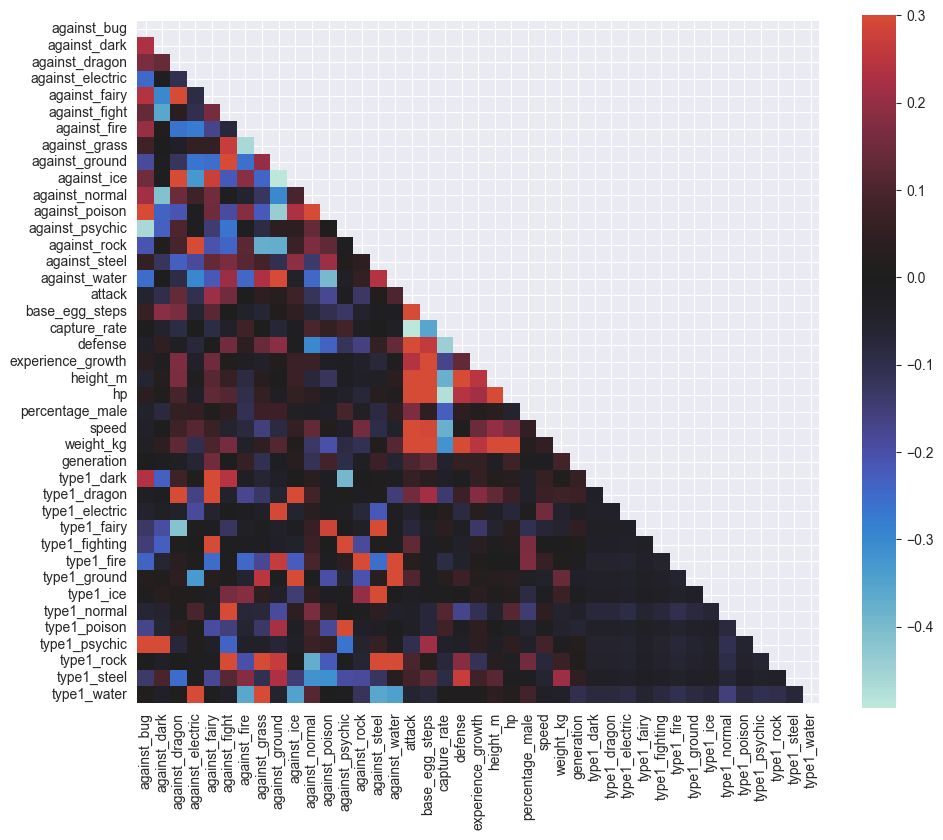

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 40))

# Plot the correlation matrix
corr = pd.concat([x_train, x_test]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, )
# TODO Write your code here
print(concatenated.shape)

### 4.2 Model fitting and Comparison

#### Tuning LR model

In [26]:
# Caclulate and print classification metrics: accuracy, precision, recall, and F1 score 
import sklearn.metrics as metrics


# TODO Write your code here
# printing clf metrics
# @param y_actual, y_pred
def print_clf_metrics(y_actual, y_pred):
    acc = metrics.accuracy_score(y_actual, y_pred)
    prec = metrics.precision_score(y_actual, y_pred)
    recall = metrics.recall_score(y_actual, y_pred)
    f1 = metrics.f1_score(y_actual, y_pred)
    print(f"Accuracy: {acc}")
    print(f"Precision: {prec}")
    print(f"Recall: {recall}")
    print(f"F1: {f1}")


In [27]:
# Specify GridSearchCV as in intruction
# TODO Write your code here
parameters = [{'penalty': ['l1', 'l2'], 'C': np.logspace(-3, 3, 7), 'solver': ['liblinear']},
              {'penalty': ['l2'], 'C': np.logspace(-3, 3, 7), 'solver': ['newton-cg', 'lbfgs']}]

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Declare and train logistic regression inside GridSearchCV with the parameters above
# Set max_iter=1000 in LR constructor
# TODO Write your code here
lr_clf_gs = GridSearchCV(LogisticRegression(max_iter=1000), parameters, scoring='f1')
lr_clf_gs.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
                         {'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs']}],
             scoring='f1')

In [29]:
print("Tuned Hyperparameters :", lr_clf_gs.best_params_)
print("Accuracy :", metrics.accuracy_score(y_train, lr_clf_gs.predict(x_train)))

Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.990625


#### Construct a LR with the best params and Evaluate the LR with the best params

In [30]:
# TODO Write your code here
# fitting the logistic regression model
lr_clf = LogisticRegression(max_iter=1000, C=1.0, penalty='l2', solver='newton-cg').fit(x_train, y_train)
lr_y_pred = lr_clf.predict(x_test)

In [31]:
print_clf_metrics(y_test, lr_y_pred)

Accuracy: 0.9937888198757764
Precision: 0.9333333333333333
Recall: 1.0
F1: 0.9655172413793104


#### Print the top 5 most influencing features and the top 5 ignored features

In [32]:
# TODO Write your code here
# finding most and least influencing features
features = pd.DataFrame({'Feature': x_train.columns, 'Parameter': lr_clf.coef_[0]})
features.head()
features_sorted = features.sort_values(by=['Parameter'], key=lambda a: abs(a)).reset_index(drop=True)
print('Least valuable features: \n', features_sorted.iloc[:5, ], '\n')
print('Most valuable features: \n', features_sorted.iloc[-5:, ])

Least valuable features: 
            Feature  Parameter
0  percentage_male   0.001832
1     type1_dragon   0.007063
2      type1_steel  -0.014856
3       type1_dark   0.042941
4   against_normal   0.048373 

Most valuable features: 
            Feature  Parameter
36   against_fight  -0.971117
37  against_ground   1.090897
38           speed   1.102332
39    type1_normal  -1.442666
40    capture_rate  -1.561561


#### Tuning KNN model

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# Declare and train knn inside GridSearchCV
# TODO Write your code here
param_grid = {'n_neighbors': range(1, 15), 'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine']}
knn_clf_gs = GridSearchCV(KNeighborsClassifier(), param_grid)
knn_clf_gs.fit(x_train, y_train)

print("Tuned Hyperparameters :", knn_clf_gs.best_params_)
print("Accuracy :", metrics.accuracy_score(y_train, knn_clf_gs.predict(x_train)))

Tuned Hyperparameters : {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy : 1.0


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [34]:
# TODO Write your code here
# constructing KNN with best params
knn_clf = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance')
knn_clf.fit(x_train, y_train)
knn_y_pred = knn_clf.predict(x_test)
print_clf_metrics(y_test, knn_y_pred)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


#### Fitting GNB to the data and evaluating on the test dataset

In [35]:
from sklearn.naive_bayes import GaussianNB

# Declare and train GaussianNB. No hyperparameters tuning 
# TODO Write your code here
gauss_nb_clf = GaussianNB()
gauss_nb_clf.fit(x_train, y_train)
gauss_y_pred = gauss_nb_clf.predict(x_test)

print_clf_metrics(y_test, gauss_y_pred)
y_test.value_counts()

Accuracy: 0.9316770186335404
Precision: 0.56
Recall: 1.0
F1: 0.717948717948718


is_legendary
0    147
1     14
Name: count, dtype: int64

#### Which metric is most appropriate for this task and why?

This dataset is unbalanced, since the number of legendary pokemons is significantly less. Thus, true positives, false negatives, and false positives are crucial. F1-score seems to be the best score for this dataset if I want to classify most legendary pokemons and not include pokemons that are not legendary.

False Positive error is more critical than False Negatives again due to the unbalance in the dataset. Even if the ratio TP/(TP+FN) is high, FPs show a model inefficiency since the dataset contains ten times more not legendary pokemons than legendary ones.  

#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.
What is the best model for this task? Explain

The most efficient model is KNN with all metrics equal to 1. KNN demands more time to compute distances to neighbor points, while LogisticRegression is faster, but less accurate. The GNB is the least efficient.

In [36]:
# TODO Write your code here

## 5. Bonus Task

#### Loading the Dataset

In [37]:
import pandas as pd

# TODO Write your code here
train_data = ...

test_data = ...

In [38]:
# Split the data
# TODO Write your code here
X_train, X_test, y_train, y_test = ...
print(X_train, y_train, X_test, y_test)

TypeError: cannot unpack non-iterable ellipsis object

####  Plot the data using the pairplot in sns

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# TODO Write your code here

#### Fit LR to the training dataset using OVR and evaluate on the test dataset

In [ ]:
# TODO Write your code here
ovr_lr = ...

#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [ ]:
# TODO Write your code here
multi_lr = ...

#### Using gridsearch to tune the C value and multi class

In [ ]:
# TODO Write your code here
params = ...
grid_search_clf = ...

In [ ]:
print("Tuned Hyperparameters :")
print("Accuracy :")

#### Comment on why one multi_class technique was better than the other

#### Create LR with the best params

In [ ]:
# TODO Write your code here
multi_lr = ...

#### Visualize the decision boundaries

In [ ]:
from mlxtend.plotting import plot_decision_regions

# TODO Write your code here
multi_lr = ...

plot_decision_regions()

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression decision boundary)
plt.show()

#### Comment on the decision boundary, do you think this is a good model or not? and based on what?